In [1]:
# 1) Preprocess data

In [2]:
import pandas as pd

# Load data
hour_df = pd.read_csv('DATA/Bike-Sharing-Dataset/hour.csv')
print(hour_df.info())
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Rename columns
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace=True)



In [4]:
# date time variable 
hour_df.datetime = pd.to_datetime(hour_df.datetime)

In [5]:
# categorical variables
hour_df.season = hour_df.season.astype('category')
hour_df.is_holiday = hour_df.is_holiday.astype('category')
hour_df.weekday = hour_df.weekday.astype('category')
hour_df.weather_condition = hour_df.weather_condition.astype('category')
hour_df.is_workingday = hour_df.is_workingday.astype('category')
hour_df.month = hour_df.month.astype('category')
hour_df.year = hour_df.year.astype('category')
hour_df.hour = hour_df.hour.astype('category')
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2) Find Distribution ans Trends


In [6]:
# initializing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('colorblind')
sns.set_context('talk')

# https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

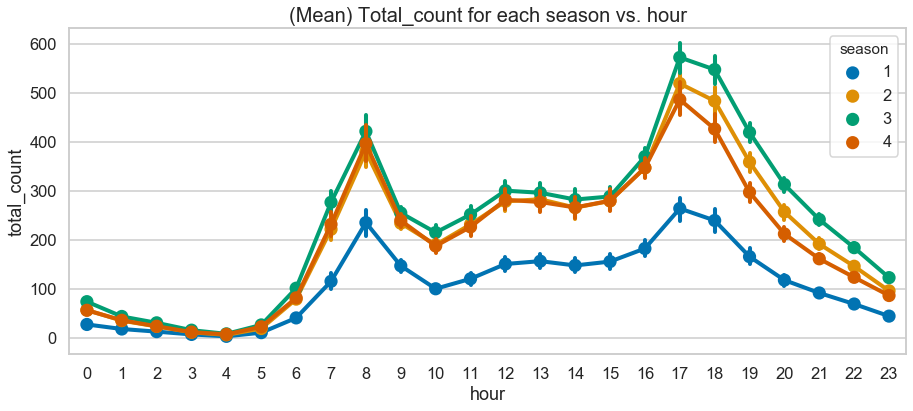

In [7]:
# Total_count for each season vs. hour
plt.figure(figsize=(15,6))
ax = sns.pointplot(x = 'hour', y = 'total_count', hue='season',data = hour_df,legend_out=True)
ax.axes.set_title('(Mean) Total_count for each season vs. hour',fontsize=20)
plt.show()



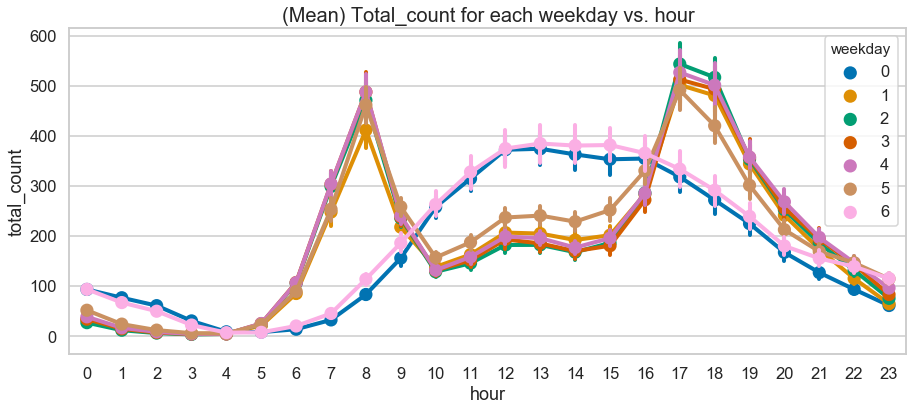

In [8]:
# Total_count for each weekday vs. hour
plt.figure(figsize=(15,6))
ax = sns.pointplot(x = 'hour', y = 'total_count', hue='weekday',data = hour_df)
ax.axes.set_title('(Mean) Total_count for each weekday vs. hour',fontsize=20)
plt.show()


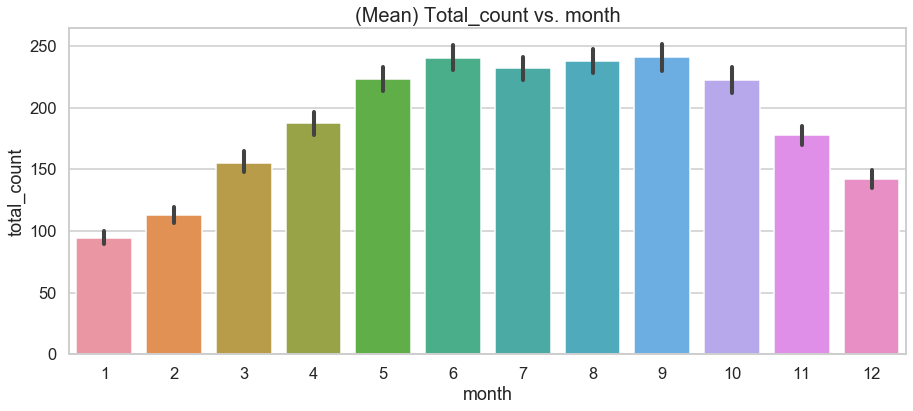

In [9]:
# Barplot: Total_count vs. month
plt.figure(figsize=(15,6))
ax = sns.barplot(x = 'month', y = 'total_count',data = hour_df)
ax.axes.set_title('(Mean) Total_count vs. month',fontsize=20)
plt.show()

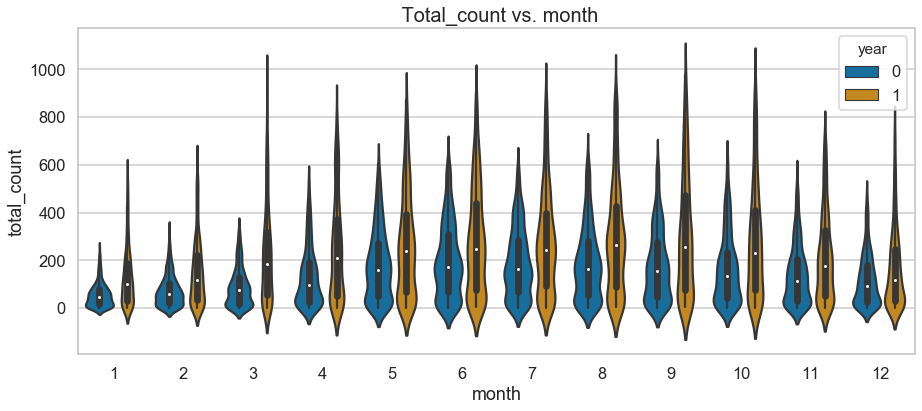

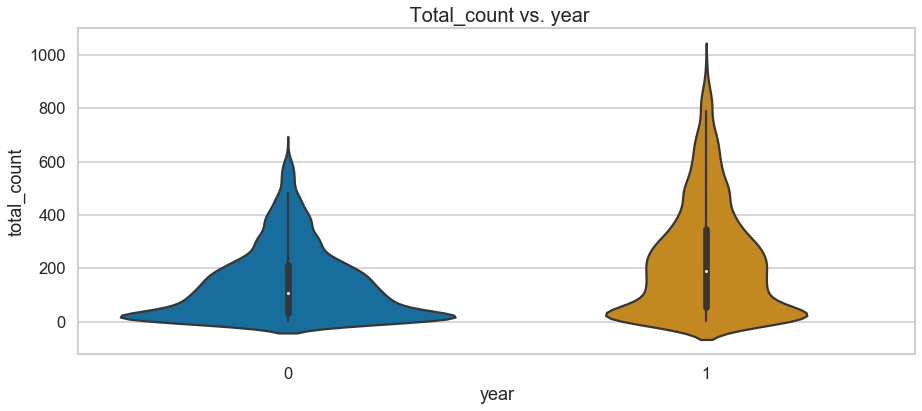

In [10]:
# Violineplot: Total_count vs. month
plt.figure(figsize=(15,6))
ax = sns.violinplot(x = 'month', y = 'total_count',hue='year', data = hour_df)
ax.axes.set_title(' Total_count vs. month',fontsize=20)
plt.show()

# Violineplot: Total_count vs. year
plt.figure(figsize=(15,6))
ax = sns.violinplot(x = 'year', y = 'total_count', data = hour_df)
ax.axes.set_title(' Total_count vs. year',fontsize=20)
plt.show()

In [11]:
hour_year = hour_df.groupby(by=['year','month']).aggregate(['sum','mean','median']).total_count
hour_year.reset_index()

,year,month,sum,mean,median
0,0,1,38189,55.507267,47.0
1,0,2,48215,74.291217,60.0
2,0,3,64045,87.732877,75.0
3,0,4,94870,131.947149,98.0
4,0,5,135821,182.555108,161.5
5,0,6,143512,199.322222,174.0
6,0,7,141341,189.974462,163.5
7,0,8,136691,186.991792,164.0
8,0,9,127418,177.709902,154.0
9,0,10,123511,166.232840,133.0


In [12]:
# 3) Find Outliers

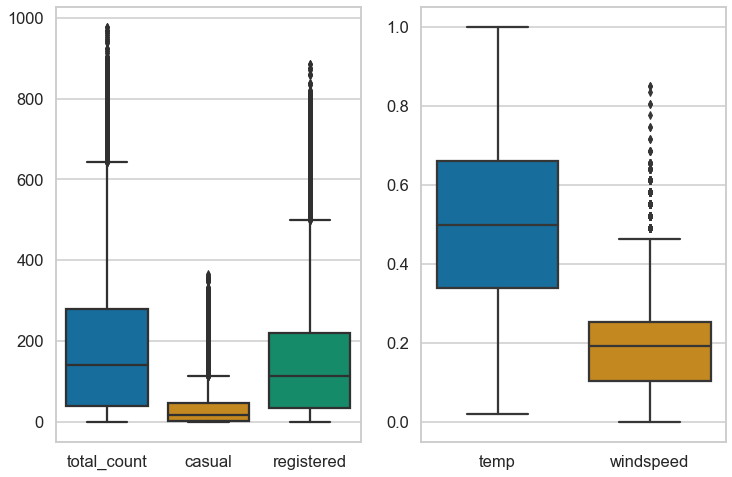

In [13]:
# Use boxplots to view the outliers
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(12,8))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)
plt.show()

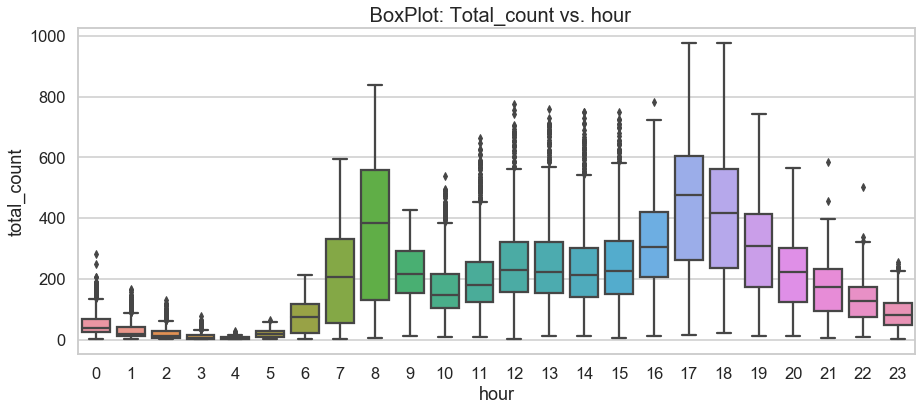

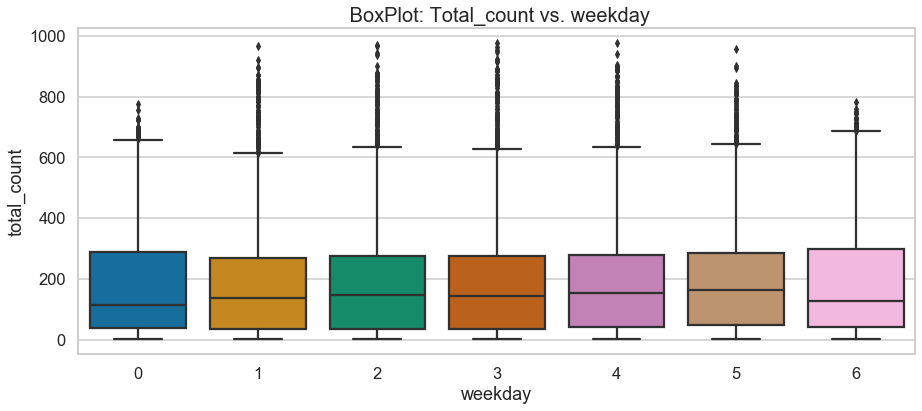

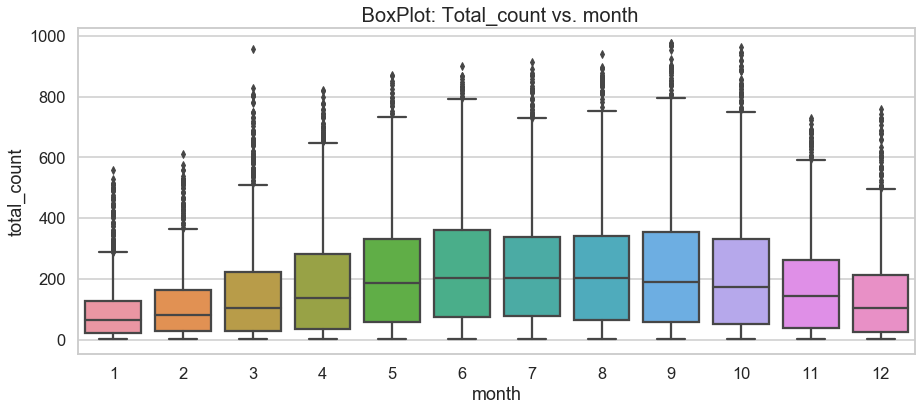

In [14]:
# check outliers at different granularity levels (hours, weekdays, months, ...)
plt.figure(figsize=(15,6))
ax = sns.boxplot(data=hour_df,x='hour',y='total_count')
ax.axes.set_title(' BoxPlot: Total_count vs. hour',fontsize=20)
plt.show()

plt.figure(figsize=(15,6))
ax = sns.boxplot(data=hour_df,x='weekday',y='total_count')
ax.axes.set_title(' BoxPlot: Total_count vs. weekday',fontsize=20)
plt.show()

plt.figure(figsize=(15,6))
ax = sns.boxplot(data=hour_df,x='month',y='total_count')
ax.axes.set_title(' BoxPlot: Total_count vs. month',fontsize=20)
plt.show()

# 4) Check Correlations

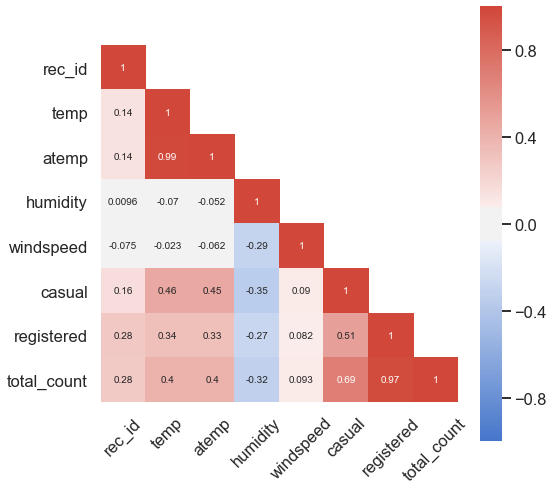

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [15]:
import numpy as np
corr = hour_df.corr()

plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(255, 15, sep=20, as_cmap=True)
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False

ax = sns.heatmap(corr,cmap=cmap,mask=mask,vmax=1.0,vmin=-1.0,square=True,annot=True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))    # avoid cut-off graph due to the y-tickmark
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()
corr


